In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
import pandas as pd


In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv(r'/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65453 entries, 0 to 65452
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65453 non-null  int64  
 1   V1      65453 non-null  float64
 2   V2      65453 non-null  float64
 3   V3      65453 non-null  float64
 4   V4      65453 non-null  float64
 5   V5      65453 non-null  float64
 6   V6      65453 non-null  float64
 7   V7      65453 non-null  float64
 8   V8      65453 non-null  float64
 9   V9      65453 non-null  float64
 10  V10     65453 non-null  float64
 11  V11     65452 non-null  float64
 12  V12     65452 non-null  float64
 13  V13     65452 non-null  float64
 14  V14     65452 non-null  float64
 15  V15     65452 non-null  float64
 16  V16     65452 non-null  float64
 17  V17     65452 non-null  float64
 18  V18     65452 non-null  float64
 19  V19     65452 non-null  float64
 20  V20     65452 non-null  float64
 21  V21     65452 non-null  float64
 22

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.duplicated().sum()

np.int64(260)

In [ ]:
df.shape

(65453, 31)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(65193, 31)

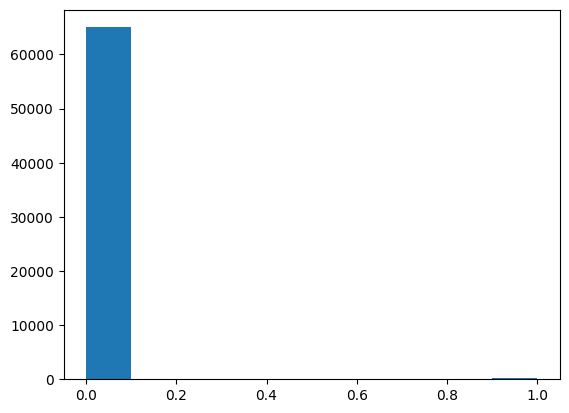

In [ ]:
plt.hist(df["Class"])
plt.show()

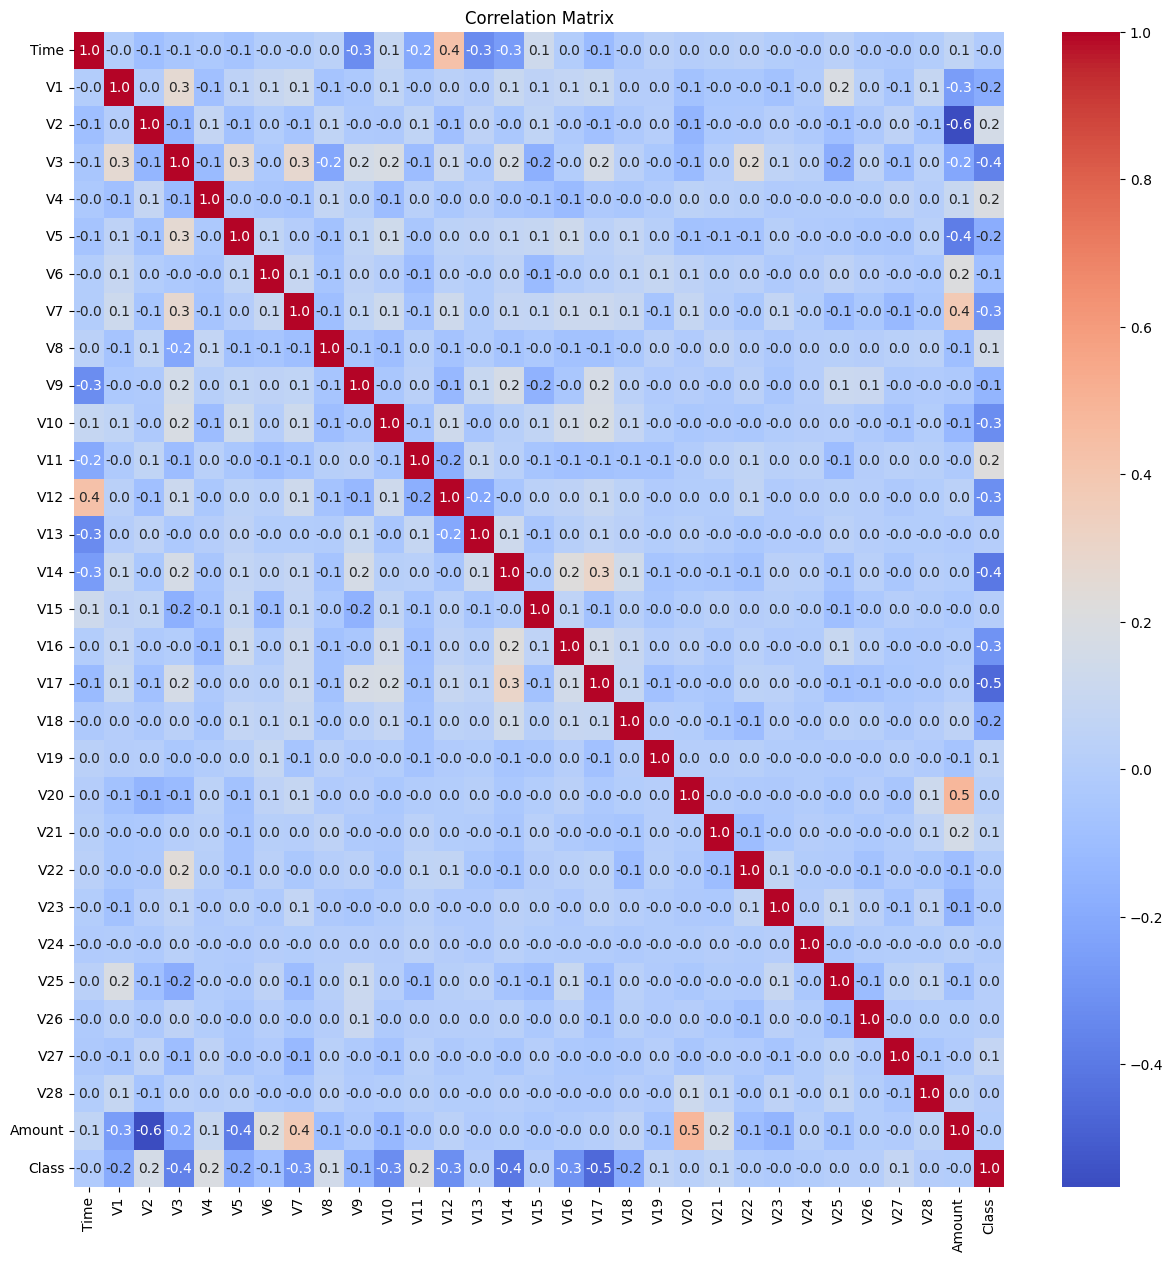

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15,15))
# Heatmap of correlation matrix
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm') # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

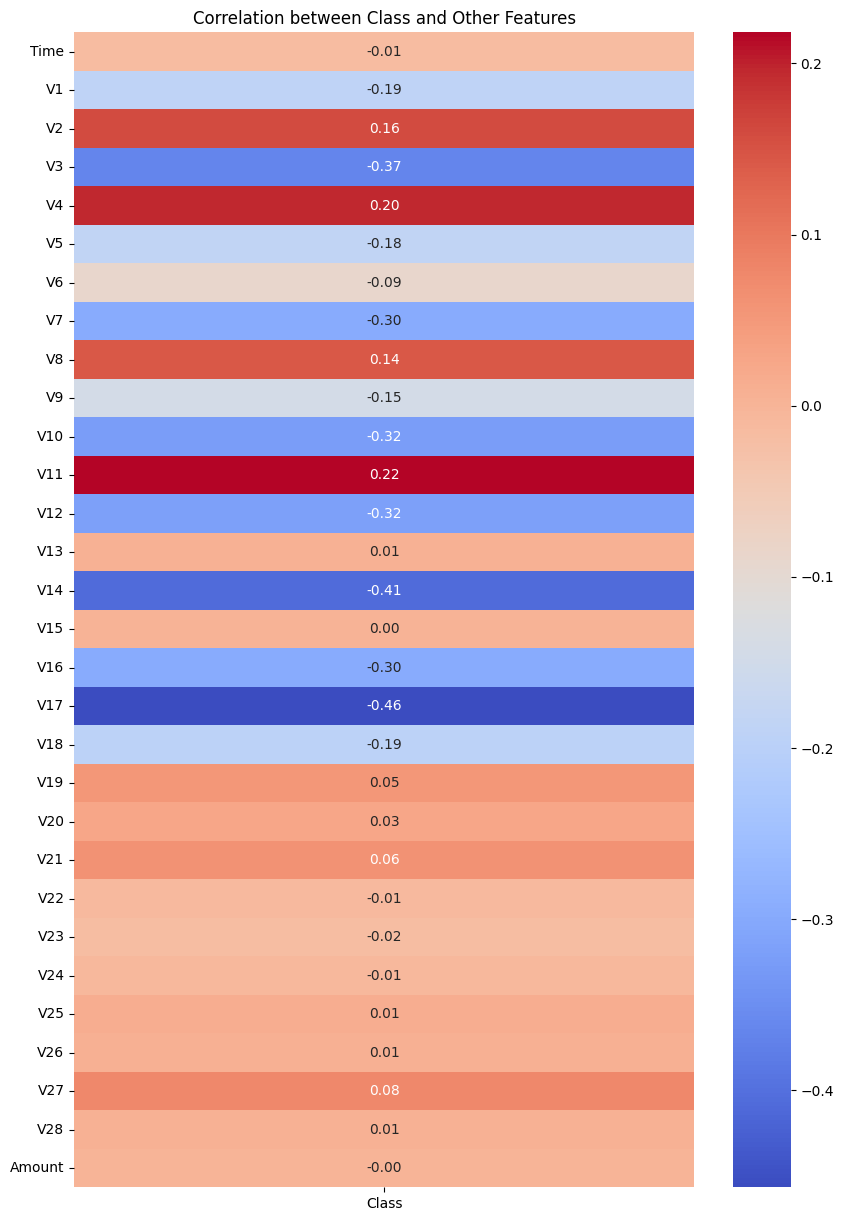

In [ ]:
class_corr = df.corr()['Class']

class_corr = class_corr.drop('Class')
plt.figure(figsize=(10,15))
sns.heatmap(class_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',cbar=True, annot_kws={'size': 10})
plt.title('Correlation between Class and Other Features')
plt.show()

In [ ]:
df.drop(["Amount","V28","V27","V26","V25","V24","V23","V22","V21","V20","V19","V15","V13","V9","V8","V6","V5","V2","V1","Time"],axis=1,inplace=True)

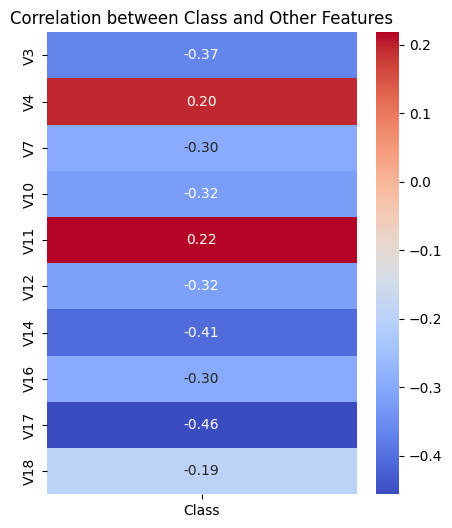

In [ ]:
class_corr = df.corr()['Class']

class_corr = class_corr.drop('Class')
plt.figure(figsize=(5,6))
sns.heatmap(class_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',cbar=True, annot_kws={'size': 10})
plt.title('Correlation between Class and Other Features')
plt.show()

<Axes: >

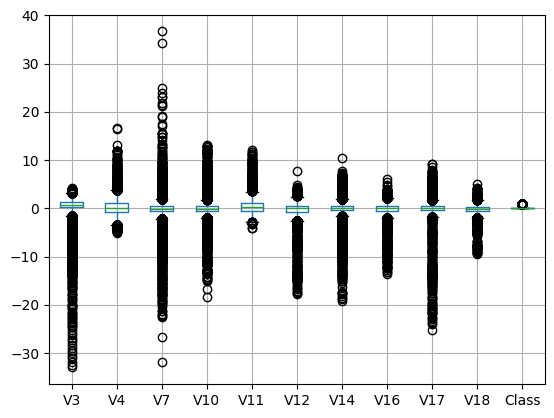

In [ ]:
df.boxplot()

In [ ]:

def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:

        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, exclude_column='Class')
df=df_cleaned

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = ['V3','V4','V7','V10','V11','V12','V14','V16','V17','V18']

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[features])

scaled_df = pd.DataFrame(scaled_data, columns=features)

In [ ]:
df['Class']

,Class
0,0.0
1,0.0
4,0.0
5,0.0
6,0.0
...,...
65444,0.0
65445,0.0
65449,0.0
65450,0.0


Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','V18']]  # Features
y = df['Class']  # Target variable

model = LogisticRegression()
model.fit(X,y)

predicted_class = model.predict([[0.913859832832795,-1.37566665499943,-1.4232356010359,1.62665905834133,1.1996439495421,-0.671439778462005,-0.0950450453999549,0.0319674667862076,0.253414715863197,0.854343814324194]])
print(predicted_class)


[0.]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Train,Test,split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score


0.999840089549852

Decision Tree

In [ ]:

import pandas as pd
df
target=df["Class"]
target

inputs=df.drop(["Class"],axis="columns")
inputs


,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195
5,1.141109,-0.168252,0.476201,-0.371407,1.341262,0.359894,-0.137134,0.401726,-0.058133,0.068653
6,0.045371,1.202613,-0.005159,-0.099254,-1.416907,-0.153826,0.167372,-0.443587,0.002821,-0.611987
...,...,...,...,...,...,...,...,...,...,...
65444,1.242986,-0.560326,-1.342963,0.716288,1.114625,-0.346995,-0.269389,1.375570,0.203267,-0.452316
65445,0.694096,1.535532,-0.774990,-0.856109,-0.864143,0.633775,0.621287,-0.388270,0.935430,-0.178177
65449,0.358313,0.579876,0.192253,-0.117394,0.219510,0.108653,0.615284,-0.127890,0.111707,-1.350507
65450,0.026676,0.239810,-0.125705,0.130748,0.288647,0.202517,0.542012,0.880929,-1.047265,0.442188


In [ ]:
#X = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','V18']]  # Features
#y = df['Class']  # Target variable

In [ ]:
#if

In [ ]:
from sklearn.preprocessing import LabelEncoder
la_df=LabelEncoder()
v3_l=la_df.fit_transform(inputs["V3"])
v4_l=la_df.fit_transform(inputs["V4"])
v7_l=la_df.fit_transform(inputs["V7"])
v10_l=la_df.fit_transform(inputs["V10"])
v11_l=la_df.fit_transform(inputs["V11"])
v12_l=la_df.fit_transform(inputs["V12"])
v14_l=la_df.fit_transform(inputs["V14"])
v16_l=la_df.fit_transform(inputs["V16"])
v17_l=la_df.fit_transform(inputs["V17"])
v18_l=la_df.fit_transform(inputs["V18"])

In [ ]:
inputs['V3']=v3_l
inputs['V4']=v4_l
inputs['V7']=v7_l
inputs['V10']=v10_l
inputs['V11']=v11_l
inputs['V12']=v12_l
inputs['V14']=v14_l
inputs['V16']=v16_l
inputs['V17']=v17_l
inputs['V18']=v18_l

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs,target)
model.score(inputs,target)

1.0

In [ ]:
model.predict([[2.53634673796914,1.37815522427443,0.239598554061257,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.311169353699879,-0.470400525259478,0.207971241929242,0.0257905801985591]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

SVM

In [ ]:
y=df['Class']
x=df.drop(["Class"],axis="columns")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [ ]:
model=SVC()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.999920044774926

In [ ]:
model.predict(xtest)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
ytest

,Class
17775,0.0
26697,0.0
45915,0.0
51054,0.0
28971,0.0
...,...
36666,0.0
309,0.0
27733,0.0
56759,0.0


In [ ]:
#linear kernal
svclassifier = SVC(kernel="linear")
svclassifier.fit(xtrain, ytrain)
svclassifier.score(xtest, ytest)

0.999920044774926

In [ ]:
#polynomial kernal
svclassifier_2 = SVC(kernel='poly', degree=8)
svclassifier_2.fit(xtrain, ytrain)
svclassifier_2.score(xtest, ytest)

0.999920044774926

In [ ]:
#Gaussian Kernel
Gau_fier = SVC(kernel ='rbf', random_state = 0)
Gau_fier.fit(xtrain, ytrain)
Gau_fier.score(xtest, ytest)

0.999920044774926

In [ ]:
#Sigmoid Kernel
sig_fier = SVC(kernel ='sigmoid')
sig_fier.fit(xtrain, ytrain)
sig_fier.score(xtest, ytest)

0.999920044774926

Random forest

In [ ]:
y=df['Class']
x=df.drop(["Class"],axis="columns")

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9997601343247782

In [ ]:
model.predict(xtest.head())

array([0., 0., 0., 0., 0.])

In [ ]:
ytest.head()

,Class
41873,0.0
42109,0.0
25309,0.0
53946,0.0
21335,0.0
